In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_excel('data_2.xlsx')

print(df)

          obs
0   54.507318
1   52.183131
2   59.587585
3   52.951728
4   53.302821
5   54.383157
6   55.394090
7   59.637172
8   53.811463
9   52.035259
10  53.763910
11  59.488890
12  56.798223
13  55.727858
14  54.434550
15  55.162684
16  51.287706
17  54.884016
18  50.340227
19  51.009715
20  53.006514
21  52.653531
22  56.323987
23  51.467548
24  56.900738
25  58.482138
26  57.659965
27  57.974599
28  52.115398
29  55.079462
30  50.647267
31  59.547734
32  53.077537
33  53.323793
34  59.695597
35  55.575524
36  51.640132
37  58.677772
38  56.789595
39  56.842751
40  52.427073
41  54.723054
42  55.294794
43  57.131708
44  55.607499
45  53.664759
46  57.620416
47  55.473823
48  55.249491
49  50.888293


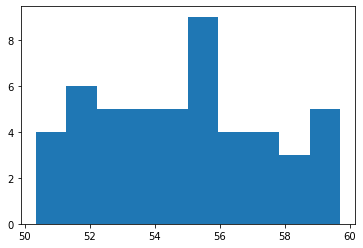

In [3]:
import matplotlib.pyplot as plt
plt.hist(df['obs'])
plt.show()

In [4]:
dsc = df.describe()

In [5]:
dsc

,obs
count,50.000000
mean,54.925080
std,2.659768
min,50.340227
25%,52.965425
50%,54.981739
75%,56.831619
max,59.695597


In [6]:
stats_labels = ['Mean Observed', 'Variance Observed', 'Skew Observed', 'Kurt Observed']
stats_values = [round(df['obs'].mean(), 2), round(df['obs'].var(), 2), round(df['obs'].skew(),2), round(df['obs'].kurt(),2)]
print(set(zip(stats_labels, stats_values)))

{('Variance Observed', 7.07), ('Mean Observed', 54.93), ('Kurt Observed', -0.87), ('Skew Observed', 0.18)}


In [7]:
df.median()

obs    54.981739
dtype: float64

D:\Anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


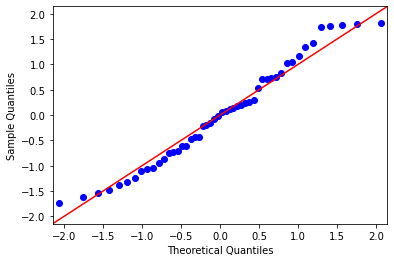

In [8]:
import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import norm
from statsmodels.graphics.gofplots import qqplot

sm.qqplot(df['obs'], line ='45',fit = True)
plt.show()

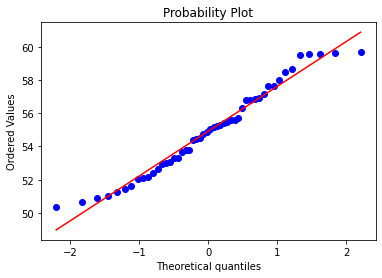

In [9]:
import scipy.stats as stats
stats.probplot(df['obs'], dist='norm', plot=plt)
plt.show()

In [10]:
df['exp'] = dsc.loc['mean']['obs']

In [11]:
df

,obs,exp
0,54.507318,54.92508
1,52.183131,54.92508
2,59.587585,54.92508
3,52.951728,54.92508
4,53.302821,54.92508
5,54.383157,54.92508
6,55.394090,54.92508
7,59.637172,54.92508
8,53.811463,54.92508
9,52.035259,54.92508


In [12]:
obs_freq = df['obs']
expec_freq = df['exp']

NULL HYPOTHESIS: The given data follows Uniform distribution.

---


ALTERNATE HYPOTHESIS: The given data does not follow Uniform distribution

In [13]:
stats.chisquare(obs_freq, expec_freq)

Power_divergenceResult(statistic=6.311215150426758, pvalue=0.9999999999999735)

In [14]:
from scipy.stats import chi2
chi2.ppf(0.95, 49) # degrees of freedom = k - p - 1.  k = 50, p = 0 (for uniform)

66.3386488629688

Since computed statistic is higher than tabulated value, we concluded we cannot reject null hypothesis.  Hence, this sample is from a uniform distribution